In [1]:
import sys, os
cwd = os.getcwd()
frameworkDir = os.path.abspath(os.path.join(cwd, os.pardir, os.pardir))
sys.path.append(frameworkDir)

import pandas as pd

from dackar.knowledge_graph.KGconstruction import KG

In [2]:
cause_dict= {'A': ['alpha','beta','gamma'],   
             'B': [1.,2.,3.]}
cause_df = pd.DataFrame(cause_dict)

In [3]:
config_file_path = '/Users/mandd/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-666d9aa2-b0c5-4903-9f08-1cad30136945/conf/neo4j.conf'
uri = "bolt://localhost:7687"
pwd = "123456789"
user='neo4j'

knowledgeGraph = KG(config_file_path, uri, pwd, user)

knowledgeGraph.resetGraph()

In [4]:
knowledgeGraph.importGraphSchema('condition_report','schemas/conditionReportSchema.toml')

TOML schema validation error: 'relation_description' is a required property
{'title': 'Condition Report Graph Schema', 'version': 1.0, 'node': {'condition_report': {'node_description': 'Represents a structured report documenting an observed abnormal event or condition within \n                      a plant or operational environment. This entity captures descriptive information provided \n                      by plant staff, including the nature, context, and potential implications of the anomaly.', 'node_properties': [{'name': 'date', 'type': 'string', 'optional': False}, {'name': 'ID', 'type': 'string', 'optional': False}]}}, 'relation': {'refers': {'relation_description': 'Indicates that a generalized nuclear-relevant entity such as materials, chemical elements \n                          and compounds, chemical reactions, failure modes, degradation mechanisms, and components \n                          across electrical, hydraulic, and mechanical systems has been explicitly refere

{'title': 'Condition Report Graph Schema',
 'version': 1.0,
 'node': {'condition_report': {'node_description': 'Represents a structured report documenting an observed abnormal event or condition within \n                      a plant or operational environment. This entity captures descriptive information provided \n                      by plant staff, including the nature, context, and potential implications of the anomaly.',
   'node_properties': [{'name': 'date', 'type': 'string', 'optional': False},
    {'name': 'ID', 'type': 'string', 'optional': False}]}},
 'relation': {'refers': {'relation_description': 'Indicates that a generalized nuclear-relevant entity such as materials, chemical elements \n                          and compounds, chemical reactions, failure modes, degradation mechanisms, and components \n                          across electrical, hydraulic, and mechanical systems has been explicitly referenced within \n                          a condition report',
   'f

In [5]:
knowledgeGraph.crossSchemasCheck()

Schema condition_report - Relation refers: Node label nuclear_entityis not defined
Schema condition_report - Relation mentions: Node label mbse_entityis not defined


In [6]:
nodeConstSchemaCause  = {'cause': {'prop1': 'A', 'prop2': 'B'}}
constSchemaCause = {'nodes': nodeConstSchemaCause}

knowledgeGraph.genericWorkflow(cause_df, constSchemaCause)

In [7]:
conseq_dict = {'C': ['x','y','z'],           
               'D': [1.1,1.2,1.3],
               'prop_rel': [2.1,2.2,2.3],
               'A': ['alpha','beta','gamma']}   # link to cause
conseq_df = pd.DataFrame(conseq_dict)

nodeConstSchemaConseq = {'consequence': {'ID_A': 'C', 'ID_B': 'D'}}
relConstSchemaConseq = [{'source': {'cause.prop1':'A'},
                         'target': {'consequence.ID_A':'C'},
                         'type'  : 'causality',
                         'properties': {'amplitude': 'prop_rel'}}] 

constSchemaConseq= {'nodes'    : nodeConstSchemaConseq,
                    'relations': relConstSchemaConseq}

knowledgeGraph.genericWorkflow(conseq_df, constSchemaConseq)

In [8]:
node_properties=[{'name': 'date', 'type': 'string', 'optional': False},
                 {'name': 'ID', 'type': 'string', 'optional': False}]

df = pd.DataFrame(node_properties)
df

,name,type,optional
0,date,string,False
1,ID,string,False


[('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')]
{'Product x 1': [('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')], 'Product x 2': [('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')], 'Product x 3': [('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')], 'Product x 4': [('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', '

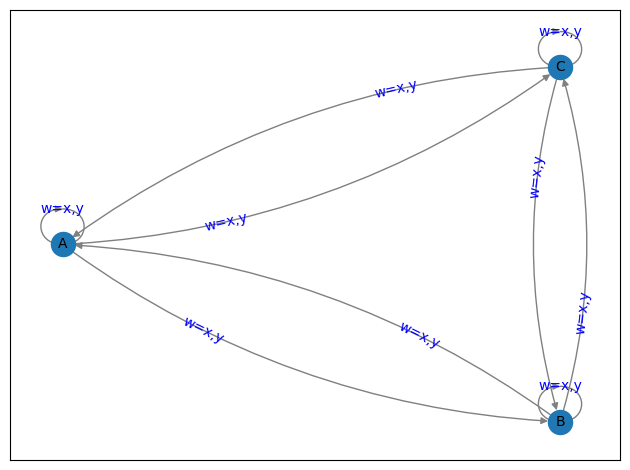

In [9]:
import itertools as it
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def draw_labeled_multigraph(G, attr_name, ax=None):
    """
    Length of connectionstyle must be at least that of a maximum number of edges
    between pair of nodes. This number is maximum one-sided connections
    for directed graph and maximum total connections for undirected graph.
    """
    # Works with arc3 and angle3 connectionstyles
    connectionstyle = [f"arc3,rad={r}" for r in it.accumulate([0.15] * 4)]
    # connectionstyle = [f"angle3,angleA={r}" for r in it.accumulate([30] * 4)]

    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color="grey", connectionstyle=connectionstyle, ax=ax)

    labels = {
        tuple(edge): f"{attr_name}={attrs[attr_name]}"
        for *edge, attrs in G.edges(keys=True, data=True)
    }
    nx.draw_networkx_edge_labels(
        G,
        pos,
        labels,
        connectionstyle=connectionstyle,
        label_pos=0.3,
        font_color="blue",
        bbox={"alpha": 0},
        ax=ax,
    )

nodes = "ABC"
prod = list(it.product(nodes, repeat=2))
pair_dict = {f"Product x {i}": prod * i for i in range(1, 5)}

print(prod)
print(pair_dict)

fig, axes = plt.subplots(1, 1)

G = nx.MultiDiGraph()
for i, (u, v) in enumerate(pair_dict['Product x 1']):
    G.add_edge(u, v, w='x,y')
draw_labeled_multigraph(G, "w")

fig.tight_layout()
plt.show()

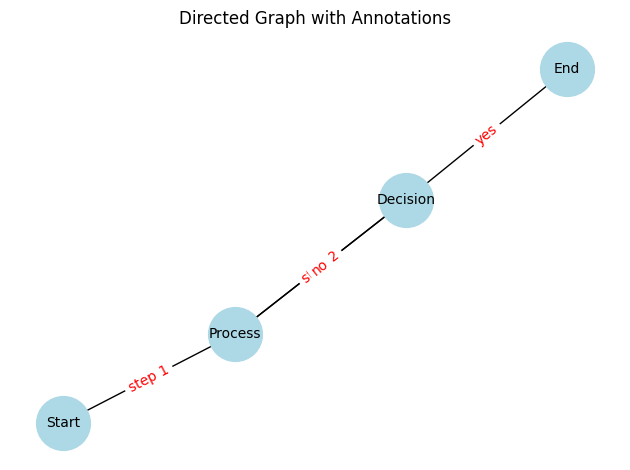

In [10]:

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels
G.add_node("A", label="Start")
G.add_node("B", label="Process")
G.add_node("C", label="Decision")
G.add_node("D", label="End")

# Add edges with labels
G.add_edge("A", "B", label="step 1")
G.add_edge("B", "C", label="step 2")
G.add_edge("C", "D", label="yes")
G.add_edge("C", "B", label="no")  # loop back

# Position nodes using spring layout
pos = nx.spring_layout(G)

# Draw nodes and labels
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Draw edges and edge labels
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the graph
plt.title("Directed Graph with Annotations")
plt.axis('off')
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd

df = pd.DataFrame({'Name': ['Alice', 'Bob'], 
                   'Age': [25, 30], 
                   'Val': [3.21, 4.56],
                   'Birth': [0, 0],
                   'City': [True, False]})
set(df['Val'].map(type))

{float}